In [92]:
import glob
import os
from collections import Counter, defaultdict
from typing import List
import re

_tokenizer = re.compile("\W+|que")
tokenizer = lambda x: _tokenizer.split(x.lower().replace("v", "u").replace("j", "i"))
simple = lambda x: x.split()

raw = glob.glob("../data/curated/corpus/generic/**/*.txt")
cltk_tokenizer = glob.glob("../data/curated/corpus/pie-http/**/*.txt")
clsq_tokenizer = glob.glob("../data/curated/corpus/pie-http-original-tokenizer/**/*.txt")


def update_counter(file: str, tokenizer):
    """ Read a file and returns a Counter """
    with open(file) as f:
        data = Counter(
            tokenizer(f.read())
        )
    return data

def read_path(directory: List[str], tokenizer):
    """ Reads a directory and return a full Counter"""
    texts = defaultdict(Counter)
    generic = Counter()
    for file in directory:
        text = os.path.basename(os.path.dirname(file))
        counter = update_counter(file, tokenizer)
        texts[text].update(counter)
        generic.update(counter)
    return texts, generic

forms, total_forms = read_path(raw, tokenizer=tokenizer)
lemma, total_lemma = read_path(cltk_tokenizer, tokenizer=simple)


In [89]:
total_lemma

Counter({'vnvs': 190919,
         'finis': 4726,
         'pro': 14219,
         'popvlvs': 10310,
         'qvi': 278016,
         'ab': 65714,
         'sanctvs': 10227,
         'longe': 3033,
         'facio': 37306,
         'svm': 326171,
         'davivs': 1708,
         'in': 199434,
         'titvlvs': 873,
         'insce': 1,
         'riptio': 1,
         'cvm': 77611,
         'teneo': 6744,
         'is': 127935,
         'allophylvs': 35,
         'gethivm': 1,
         'qvintvs': 126590,
         'miserer': 24,
         'mevs': 20549,
         'dominvs': 22731,
         'qvoniam': 7366,
         'concvlco': 91,
         'ego': 46522,
         'homo': 27044,
         'totvs': 11112,
         'dies': 16465,
         'pvgno': 1686,
         'tribvlo': 35,
         'inimicvs': 2579,
         'et': 313613,
         'reliqvvs': 2127,
         'mvlta': 292,
         'psalma': 241,
         'svperscriptio': 44,
         'comprehendo': 1348,
         'praeter': 2508,
         'r

In [125]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as matplot_plot
import pandas as pd

# Create a random dataset across several variables
# Shape should be (Y, X)
def make_array(texts, generic):
    return pd.DataFrame(list([
        (word, text, generic[word])#/generic[word])
        for text, text_counter in texts.items()
        for word, word_count in text_counter.items()
    ]), columns=("word", "text", "word_count"))
f = make_array(forms, total_forms)
l = make_array(lemma, total_lemma)


In [95]:
print(f[f.word_count<=2])
print(l[l.word_count<=2])

                             word  \
12                           insc   
13                       riptione   
23                    conculcauit   
29                     tribulauit   
74                     increpitae   
89                            prs   
172               superscriptioni   
220                   misereremei   
221            quoniamconculcauit   
222                       totadie   
244                   conculcatum   
296                     debellant   
360                      deimpiis   
388                   exinanienti   
402                    degrauatus   
426                       abcisae   
429                     obduceret   
432                  interlabente   
442                 exsecrabantur   
464                    occulentes   
477                conspirationes   
481                  sequiturenim   
482      sicutexpectaueruntanimam   
544                         abira   
571                      lacrimsb   
580                       inituro   
5

In [150]:
MAX_COUNT = 10
f2 = pd.pivot_table(
    f[f.word_count <= MAX_COUNT],
    index="text",
    columns="word_count",
    aggfunc='count',fill_value=0
)
l2 = pd.pivot_table(
    l[l.word_count <= MAX_COUNT],
    index="text",
    columns="word_count",
    aggfunc='count',
    fill_value=0
)
# Check its correct
print(f[f.word_count == 1][f.text == "urn:cts:latinLit:stoa0244d.stoa005.opp-lat1"].word)
f2

1448205            deseito
1448227        mansueuimus
1448316         peroptimum
1448331      scandalizanti
1448380               sans
1448414          adsistant
1448513      celebrabuntur
1448584          erubuerim
1448601        quoquolibet
1448649    indissociabilis
1448670         concitabar
1448688        tnmultuosis
1448790         cenodoxiam
1448797             mantes
1448908              dotia
1448973         transmouet
1449014        recubantium
1449031              guius
1449086               deat
1449143      conscendendus
1449158            introdu
1449160     percontationis
1449173            tificat
1449179              inmun
1449186              recen
1449240                lap
1449279        dedecorosum
1449294         diuiniores
1449345              proxi
1449349              susce
                ...       
1455710       emendarentur
1455716              esuri
1455725             dantia
1455729         repropitia
1455739          interueni
1455745            inpetra
1

/home/thibault/dev/these/these_env/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


word                       \
word_count                                           1     2    3    4    5    
text                                                                           
urn:cts:greekLit:tlg0526.tlg003.opp-lat1            389   173  144  120  105   
urn:cts:latinLit:phi0448.phi001.perseus-lat2        576   338  292  264  213   
urn:cts:latinLit:phi0448.phi002.perseus-lat2        321   203  207  163  148   
urn:cts:latinLit:phi0472.phi001.perseus-lat2        412   173  128  100   91   
urn:cts:latinLit:phi0474.phi005.perseus-lat2        944   630  489  428  402   
urn:cts:latinLit:phi0474.phi011.perseus-lat2        175   115   91   80   67   
urn:cts:latinLit:phi0474.phi013.perseus-lat2        111    75   68   67   44   
urn:cts:latinLit:phi0474.phi036.perseus-lat1        226   137  133   98  101   
urn:cts:latinLit:phi0474.phi037.perseus-lat1        566   381  330  269  300   
urn:cts:latinLit:phi0474.phi043.perseus-lat1        174   147  111  107   80   
urn:cts:latinLit:phi0474.phi045.perseus-lat1         56    37   29   27   24   
urn:cts:latinLit:phi0474.phi047.perseus-lat1         49    44   26   22   18   
urn:cts:latinLit:phi0474.phi048.perseus-lat1        535   263  200  194  160   
urn:cts:latinLit:phi0474.phi049.perseus-lat1        788   466  349  333  238   
urn:cts:latinLit:phi0474.phi050.perseus-lat1        413   226  212  174  148   
urn:cts:latinLit:phi0474.phi053.perseus-lat1        339   206  175  157  121   
urn:cts:latinLit:phi0474.phi056.perseus-lat1       1199   727  521  432  436   
urn:cts:latinLit:phi0474.phi057.perseus-lat1       1481   866  635  501  442   
urn:cts:latinLit:phi0474.phi058.perseus-lat1        259   147  122   91  111   
urn:cts:latinLit:phi0474.phi059.perseus-lat1         84    52   36   38   35   
urn:cts:latinLit:phi0550.phi001.perseus-lat1        779   365  248  220  213   
urn:cts:latinLit:phi0620.phi001.perseus-lat3        399   236  192  189  158   
urn:cts:latinLit:phi0631.phi003.perseus-lat2        100    43   33   24   16   
urn:cts:latinLit:phi0631.phi007.thayer-lat1          62    26   23   23   16   
urn:cts:latinLit:phi0660.phi001.perseus-lat2        120    77   87   72   60   
urn:cts:latinLit:phi0660.phi003.perseus-lat2          0     2    0    1    2   
urn:cts:latinLit:phi0684.phi002.thayer-lat1         792   427  280  259  207   
urn:cts:latinLit:phi0690.phi001.perseus-lat2         62    51   41   37   40   
urn:cts:latinLit:phi0690.phi002.perseus-lat2        111   124  123  120  116   
urn:cts:latinLit:phi0690.phi003.perseus-lat2        577   475  403  405  340   
...                                                 ...   ...  ...  ...  ...   
urn:cts:latinLit:stoa0238.stoa006.perseus-lat2      119    75   64   51   57   
urn:cts:latinLit:stoa0238.stoa007.perseus-lat2      189   132  103   85   84   
urn:cts:latinLit:stoa0241d.stoa002.opp-lat1         344   130   99   80   72   
urn:cts:latinLit:stoa0244d.stoa005.opp-lat1         483   188  152  170  114   
urn:cts:latinLit:stoa0245a.stoa001.opp-lat1         248   168  140  127  102   
urn:cts:latinLit:stoa0247.stoa001.thayer-lat1        63    39   39   28   33   
urn:cts:latinLit:stoa0249a.stoa002.opp-lat1         623   305  231  203  175   
urn:cts:latinLit:stoa0249a.stoa003.opp-lat2          58    41   33   24   23   
urn:cts:latinLit:stoa0249a.stoa004.opp-lat1         236   161  100   95   85   
urn:cts:latinLit:stoa0252.stoa002.opp-lat1           93    79   79   64   58   
urn:cts:latinLit:stoa0252.stoa003.opp-lat2           29    14    5    5    3   
urn:cts:latinLit:stoa0252.stoa008.opp-lat1          280   176  146  131  118   
urn:cts:latinLit:stoa0255.stoa010.perseus-lat2      275   168  167  112  112   
urn:cts:latinLit:stoa0270.stoa001.opp-lat1          378   178  168  142  133   
urn:cts:latinLit:stoa0270.stoa002.opp-lat2           50    45   31   34   32   
urn:cts:latinLit:stoa0270.stoa003.opp-lat2          163    97  105   93   92   
urn:cts:latinLit:stoa0270.stoa005.opp-lat1         

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

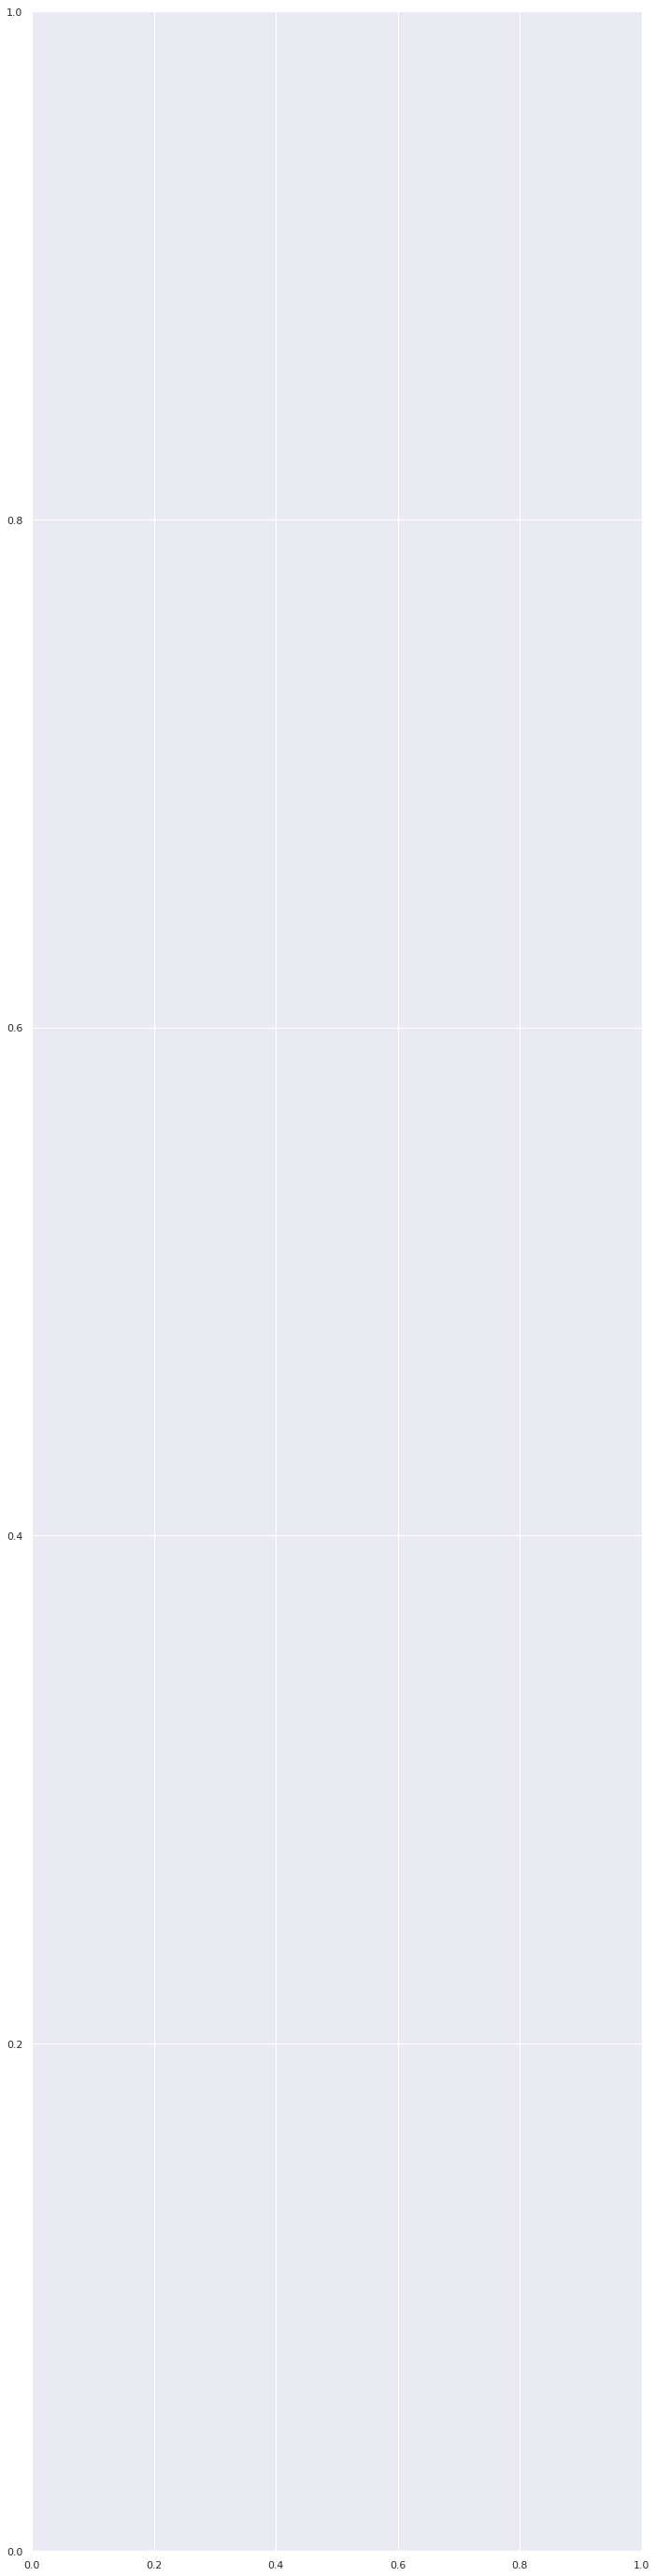

In [131]:
# Use cubehelix to get a custom sequential palette
#  where the palette moves over form
pal = sns.cubehelix_palette(len(forms), rot=-.5, dark=.3)

# Show each distribution with both violins and points
fig, ax = matplot_plot.subplots(figsize=(11.7, 50))
ax = sns.heatmap(
    data=f,
    ax=ax
)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

matplot_plot.show()